In [1]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import seawater as sw
import scipy.io as sio

import MITgcmutils as mit
from MITgcmutils import cs

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})
rcParams.update({'font.size': 18})

In [2]:
# load grid and diversity data

indir = '../../comparison/data/HRgrid/'

#import grid params for CR grid

in_file = '%s/HFacC.data' % indir
HF = np.fromfile(in_file, dtype = '>f')
HF = HF.reshape(50, 510, 3060)[0,:,:]

in_file = '%s/XG.data' % indir
XC = np.fromfile(in_file, dtype = '>f')
XC = XC.reshape(510, 3060)

in_file = '%s/YG.data' % indir
YC = np.fromfile(in_file, dtype = '>f')
YC = YC.reshape(510, 3060)

# load diversity data

in_file = r'/Volumes/My Passport/high_res/DIVER4/DIVER4_day.0289.data'
div = np.fromfile(in_file, dtype = '>f')
div = div.reshape(510, 3060)

div = ma.masked_where(HF == 0, div, copy=False)

print np.max(div)

21.0


In [3]:
# import satellite tau index data

path = '../data/tau_global_an15_20130605.mat'
content = sio.loadmat(path)
lon = content['bslonv']
lat = content['bslatv']
tau = content['bs']

tau_lon, tau_lat = np.meshgrid(lon,lat)

/Users/sclayton/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1638: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/sclayton/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/sclayton/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3279: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/sclayton/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3318: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(0,0.5,u'Latitude')

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


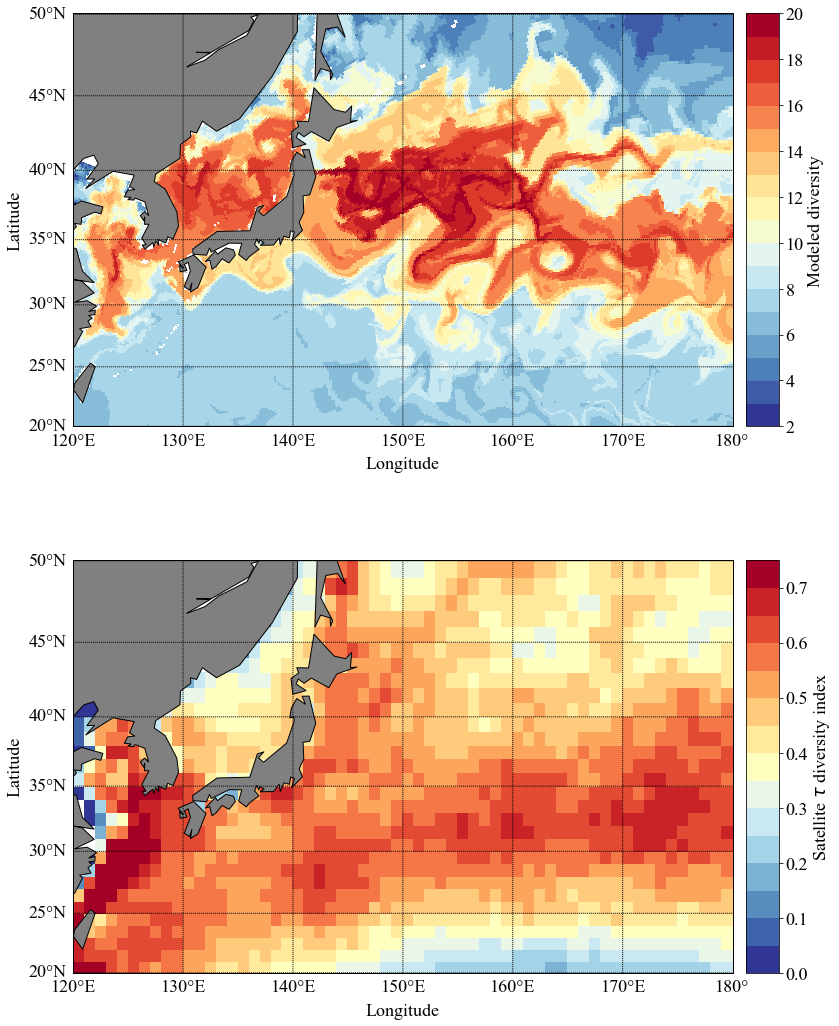

In [4]:
from MITgcmutils.cs import pcol

fig0 = plt.figure(figsize=(12,16), dpi = 300)

ax1 = fig0.add_subplot(211)
m = Basemap(projection='merc',llcrnrlat=20.,urcrnrlat=50.05,\
            llcrnrlon=120.,urcrnrlon=180.,lat_ts=0,resolution='c', ax = ax1)

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')

palette = plt.get_cmap('RdYlBu_r', 18)
palette.set_bad('w',1.0)

pcol(XC, YC, div, projection=m, vmin=2., vmax=20., cmap = palette)

cb = m.colorbar()
cb.set_label('Modeled diversity')

m.drawparallels(np.arange(-50,80,5),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180,180,10),labels=[0,0,0,1])

plt.tick_params(axis='both', which='major')
plt.tick_params(axis='both', which='minor')
plt.xlabel('Longitude', labelpad = 30)
plt.ylabel('Latitude', labelpad = 50)

# plt.title('Modeled phytoplankton diversity', fontsize = 18)
ax2 = fig0.add_subplot(212)
m = Basemap(projection='merc',llcrnrlat=20.,urcrnrlat=50.05,\
            llcrnrlon=120.,urcrnrlon=180.,lat_ts=0,resolution='c', ax = ax2)

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')

palette = plt.get_cmap('RdYlBu_r', 15)
palette.set_bad('w',1.0)

xx, yy = m(tau_lon, tau_lat)
tt = m.pcolor(xx, yy, tau, vmin = 0., vmax = 0.75, cmap = palette)

cb2 = m.colorbar(tt)
cb2.set_label(r'Satellite $\tau$ diversity index')

m.drawparallels(np.arange(-50,80,5),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180,180,10),labels=[0,0,0,1])

plt.tick_params(axis='both', which='major')
plt.tick_params(axis='both', which='minor')
plt.xlabel('Longitude', labelpad = 30)
plt.ylabel('Latitude', labelpad = 50)


# fig0.savefig('../figures/Figure1.png', dpi = 300)